In [303]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [304]:
sns.set_style('darkgrid')

In [305]:
# Genuine users
gu_df = pd.read_csv('./cresci-2017/genuine_accounts.csv/users.csv', sep = ',')
gu_list = gu_df['id'].values.astype(int)

# Social spambots
ssbots1_df = pd.read_csv('./cresci-2017/social_spambots_1.csv/users.csv', sep = ',')
ssbots1_list = ssbots1_df['id'].values.astype(int)
ssbots2_df = pd.read_csv('./cresci-2017/social_spambots_2.csv/users.csv', sep = ',')
ssbots2_list = ssbots2_df['id'].values.astype(int)
ssbots3_df = pd.read_csv('./cresci-2017/social_spambots_3.csv/users.csv', sep = ',')
ssbots3_list = ssbots3_df['id'].values.astype(int)

# traditional spambots
tsbots1_df = pd.read_csv('./cresci-2017/traditional_spambots_1.csv/users.csv', sep = ',')
tsbots1_list = tsbots1_df['id'].values.astype(int)
tsbots2_df = pd.read_csv('./cresci-2017/traditional_spambots_2.csv/users.csv', sep = ',')
tsbots2_list = tsbots2_df['id'].values.astype(int)
tsbots3_df = pd.read_csv('./cresci-2017/traditional_spambots_3.csv/users.csv', sep = ',')
tsbots3_list = tsbots3_df['id'].values.astype(int)
tsbots4_df = pd.read_csv('./cresci-2017/traditional_spambots_4.csv/users.csv', sep = ',')
tsbots4_list = tsbots4_df['id'].values.astype(int)

# combine social spambots and traditional spambots
ssbots_list = list(ssbots1_list) + list(ssbots2_list) + list(ssbots3_list)
tsbots_list = list(tsbots1_list) + list(tsbots2_list) + list(tsbots3_list) + list(tsbots4_list)

In [306]:
# Add labels to each dataframe
gu_df['label'] = 'genuine'

ssbots1_df['label'] = 'social_spambot'
ssbots2_df['label'] = 'social_spambot'
ssbots3_df['label'] = 'social_spambot'

tsbots1_df['label'] = 'traditional_spambot'
tsbots2_df['label'] = 'traditional_spambot'
tsbots3_df['label'] = 'traditional_spambot'
tsbots4_df['label'] = 'traditional_spambot'

# Combine all dataframes
df = pd.concat([
    gu_df,
    ssbots1_df, ssbots2_df, ssbots3_df,
    tsbots1_df, tsbots2_df, tsbots3_df, tsbots4_df
], ignore_index=True)

# Print class distribution
print(df['label'].value_counts())

# Optional: Create numeric labels for machine learning
df['target'] = df['label'].map({
    'genuine': 0,
    'social_spambot': 1,
    'traditional_spambot': 2
})

label
social_spambot         4912
genuine                3474
traditional_spambot    2631
Name: count, dtype: int64


In [307]:
df['target']

0        0
1        0
2        0
3        0
4        0
        ..
11012    2
11013    2
11014    2
11015    2
11016    2
Name: target, Length: 11017, dtype: int64

<Axes: xlabel='followers_count', ylabel='statuses_count'>

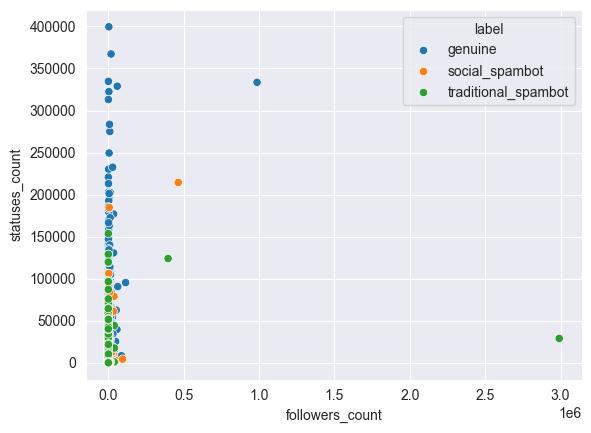

In [308]:
sns.scatterplot(x='followers_count', y='statuses_count', hue='label', data=df)

In [309]:
df.columns



Index(['id', 'name', 'screen_name', 'statuses_count', 'followers_count',
       'friends_count', 'favourites_count', 'listed_count', 'url', 'lang',
       'time_zone', 'location', 'default_profile', 'default_profile_image',
       'geo_enabled', 'profile_image_url', 'profile_banner_url',
       'profile_use_background_image', 'profile_background_image_url_https',
       'profile_text_color', 'profile_image_url_https',
       'profile_sidebar_border_color', 'profile_background_tile',
       'profile_sidebar_fill_color', 'profile_background_image_url',
       'profile_background_color', 'profile_link_color', 'utc_offset',
       'is_translator', 'follow_request_sent', 'protected', 'verified',
       'notifications', 'description', 'contributors_enabled', 'following',
       'created_at', 'timestamp', 'crawled_at', 'updated', 'test_set_1',
       'test_set_2', 'label', 'target'],
      dtype='object')

In [310]:
df[df['target'] == 1]

,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,url,lang,...,contributors_enabled,following,created_at,timestamp,crawled_at,updated,test_set_1,test_set_2,label,target
3474,24858289,Davide Bertoli,davideb66,1299,22,40,1,0,NaN,it,...,NaN,NaN,Tue Mar 17 08:51:12 +0000 2009,2009-03-17 09:51:12,2014-04-19 14:46:19,2016-03-15 14:12:22,1.0,NaN,social_spambot,1
3475,33212890,Elisa D'Ospina,ElisaDospina,18665,12561,3442,16358,110,http://t.co/ceK8TovxwI,it,...,NaN,NaN,Sun Apr 19 14:38:04 +0000 2009,2009-04-19 16:38:04,2014-05-18 23:20:58,2016-03-15 14:17:13,1.0,NaN,social_spambot,1
3476,39773427,Donato Vincenzo,Vladimir65,22987,600,755,14,6,NaN,it,...,NaN,NaN,Wed May 13 15:34:41 +0000 2009,2009-05-13 17:34:41,2014-05-13 23:21:54,2016-03-15 14:16:44,1.0,NaN,social_spambot,1
3477,57007623,Rafiela Morales L.,RafielaMorales,7975,398,350,11,2,NaN,en,...,NaN,NaN,Wed Jul 15 12:55:03 +0000 2009,2009-07-15 14:55:03,2014-05-19 23:24:18,2016-03-15 14:18:54,1.0,NaN,social_spambot,1
3478,63258466,§ h a † u r♄,FabrizioC_c,20218,413,405,162,8,http://t.co/PK5F0JDKcy,it,...,NaN,NaN,Wed Aug 05 21:12:49 +0000 2009,2009-08-05 23:12:49,2014-05-11 23:22:23,2016-03-15 14:17:05,1.0,NaN,social_spambot,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8381,2396095423,Aldridge Biz Opp,AldridgeBizOpp,106,4,23,0,0,NaN,en,...,NaN,NaN,Tue Mar 18 11:52:26 +0000 2014,2014-03-18 12:52:26,2014-05-05 23:17:51,2016-03-15 15:41:19,NaN,1.0,social_spambot,1
8382,2396099064,DL Business Opp,DLBusinessOpp,173,2,20,0,0,NaN,en,...,NaN,NaN,Tue Mar 18 12:03:23 +0000 2014,2014-03-18 13:03:23,2014-05-05 23:17:51,2016-03-15 15:41:22,NaN,1.0,social_spambot,1
8383,2429375022,LF Career Options,LFCareerOptions,137,29,124,0,0,NaN,en,...,NaN,NaN,Sat Apr 05 19:47:10 +0000 2014,2014-04-05 21:47:10,2014-05-05 23:17:51,2016-03-15 15:41:12,NaN,1.0,social_spambot,1
8384,2429405521,Rick Chou,RickChou_TD,170,115,353,38,2,NaN,en,...,NaN,NaN,Sat Apr 05 20:07:04 +0000 2014,2014-04-05 22:07:04,2014-05-05 22:56:05,2016-03-15 15:40:35,NaN,1.0,social_spambot,1


In [311]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 44 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  11017 non-null  int64  
 1   name                                11016 non-null  object 
 2   screen_name                         11017 non-null  object 
 3   statuses_count                      11017 non-null  int64  
 4   followers_count                     11017 non-null  int64  
 5   friends_count                       11017 non-null  int64  
 6   favourites_count                    11017 non-null  int64  
 7   listed_count                        11017 non-null  int64  
 8   url                                 3508 non-null   object 
 9   lang                                10017 non-null  object 
 10  time_zone                           5015 non-null   object 
 11  location                            4908 

In [312]:
print(df.describe())

                 id  statuses_count  followers_count  friends_count  \
count  1.101700e+04    11017.000000     1.101700e+04   11017.000000   
mean   1.235671e+09     6581.373877     1.126982e+03     656.010075   
std    1.084880e+09    19725.682122     3.069802e+04    3039.022632   
min    6.780330e+05        0.000000     0.000000e+00       0.000000   
25%    1.068498e+08       46.000000     6.000000e+00      40.000000   
50%    6.338957e+08       99.000000     1.310000e+02     202.000000   
75%    2.360092e+09     4272.000000     5.200000e+02     542.000000   
max    4.331280e+09   399555.000000     2.991573e+06  211890.000000   

       favourites_count  listed_count  default_profile  default_profile_image  \
count      11017.000000  11017.000000           1477.0                   72.0   
mean        1492.338568     14.550513              1.0                    1.0   
std         6856.574350    304.798431              0.0                    0.0   
min            0.000000      0.00000

In [313]:
df = df.drop_duplicates()

In [314]:
df = df.fillna(0)

In [315]:
df

,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,url,lang,...,contributors_enabled,following,created_at,timestamp,crawled_at,updated,test_set_1,test_set_2,label,target
0,1502026416,TASUKU HAYAKAWA,0918Bask,2177,208,332,265,1,0,ja,...,0.0,0.0,Tue Jun 11 11:20:35 +0000 2013,2013-06-11 13:20:35,2015-05-02 06:41:46,2016-03-15 15:53:47,0.0,0.0,genuine,0
1,2492782375,ro_or,1120Roll,2660,330,485,3972,5,0,ja,...,0.0,0.0,Tue May 13 10:37:57 +0000 2014,2014-05-13 12:37:57,2015-05-01 17:20:27,2016-03-15 15:53:48,0.0,0.0,genuine,0
2,293212315,bearclaw,14KBBrown,1254,166,177,1185,0,0,en,...,0.0,0.0,Wed May 04 23:30:37 +0000 2011,2011-05-05 01:30:37,2015-05-01 18:48:28,2016-03-15 15:53:48,0.0,0.0,genuine,0
3,191839658,pocahontas farida,wadespeters,202968,2248,981,60304,101,http://t.co/rGV0HIJGsu,en,...,0.0,0.0,Fri Sep 17 14:02:10 +0000 2010,2010-09-17 16:02:10,2015-05-01 13:55:16,2016-03-15 15:53:48,0.0,0.0,genuine,0
4,3020965143,Ms Kathy,191a5bd05da04dc,82,21,79,5,0,0,en,...,0.0,0.0,Fri Feb 06 04:10:49 +0000 2015,2015-02-06 05:10:49,2015-05-02 01:17:32,2016-03-15 15:53:48,0.0,0.0,genuine,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11012,818079408,Columbia Facil. Mgmt,tmj_cae_facmgmt,41,169,151,0,12,http://t.co/TKb82K4tFJ,en,...,0.0,0.0,Tue Sep 11 20:00:43 +0000 2012,2012-09-11 22:00:43,2016-03-15 13:49:15,2016-03-15 13:49:15,0.0,0.0,traditional_spambot,2
11013,846108068,NJ Business/Mgmt,tmj_nj_mgmt,218,332,245,0,31,https://t.co/DByWt4njnT,en,...,0.0,0.0,Tue Sep 25 19:35:53 +0000 2012,2012-09-25 21:35:53,2016-03-15 13:49:15,2016-03-15 13:49:15,0.0,0.0,traditional_spambot,2
11014,857076271,PR Customer Ser.,tmj_ptr_cstsrv,17,530,300,0,8,http://t.co/paWgrkSWfT,en,...,0.0,0.0,Mon Oct 01 21:47:23 +0000 2012,2012-10-01 23:47:23,2016-03-15 13:49:15,2016-03-15 13:49:15,0.0,0.0,traditional_spambot,2
11015,872126906,PR Soft Dev Java,tmj_ptr_itjava,2,247,202,0,1,http://t.co/OnFSpFHC7G,en,...,0.0,0.0,Wed Oct 10 16:44:09 +0000 2012,2012-10-10 18:44:09,2016-03-15 13:49:15,2016-03-15 13:49:15,0.0,0.0,traditional_spambot,2


In [316]:
df.columns

Index(['id', 'name', 'screen_name', 'statuses_count', 'followers_count',
       'friends_count', 'favourites_count', 'listed_count', 'url', 'lang',
       'time_zone', 'location', 'default_profile', 'default_profile_image',
       'geo_enabled', 'profile_image_url', 'profile_banner_url',
       'profile_use_background_image', 'profile_background_image_url_https',
       'profile_text_color', 'profile_image_url_https',
       'profile_sidebar_border_color', 'profile_background_tile',
       'profile_sidebar_fill_color', 'profile_background_image_url',
       'profile_background_color', 'profile_link_color', 'utc_offset',
       'is_translator', 'follow_request_sent', 'protected', 'verified',
       'notifications', 'description', 'contributors_enabled', 'following',
       'created_at', 'timestamp', 'crawled_at', 'updated', 'test_set_1',
       'test_set_2', 'label', 'target'],
      dtype='object')

In [317]:
len(df.columns)

44

In [318]:
df = df.drop(columns=['follow_request_sent', 'profile_background_image_url', 'profile_background_image_url_https', 'profile_banner_url', 'profile_image_url', 'profile_image_url_https', 'profile_link_color', 'profile_sidebar_fill_color', 'profile_text_color', 'profile_background_color', 'profile_sidebar_border_color', 'profile_background_image_url_https', 'profile_banner_url', 'profile_image_url', 'profile_image_url_https', 'profile_link_color', 'profile_sidebar_fill_color', 'profile_text_color',  'profile_background_color', 'profile_sidebar_border_color'])

In [319]:
df.columns

Index(['id', 'name', 'screen_name', 'statuses_count', 'followers_count',
       'friends_count', 'favourites_count', 'listed_count', 'url', 'lang',
       'time_zone', 'location', 'default_profile', 'default_profile_image',
       'geo_enabled', 'profile_use_background_image',
       'profile_background_tile', 'utc_offset', 'is_translator', 'protected',
       'verified', 'notifications', 'description', 'contributors_enabled',
       'following', 'created_at', 'timestamp', 'crawled_at', 'updated',
       'test_set_1', 'test_set_2', 'label', 'target'],
      dtype='object')

In [320]:
df['crawled_at'].describe()

count                   11017
unique                   3823
top       2010-11-07 11:10:52
freq                     1000
Name: crawled_at, dtype: object

In [321]:
df['updated'].describe()

count                   11017
unique                   3084
top       2016-03-15 11:39:07
freq                      100
Name: updated, dtype: object

In [322]:
len(df.columns)

33

In [323]:
df= df.drop(columns=['id', 'name', 'screen_name'])

In [324]:
df = df.drop(columns=['notifications', 'contributors_enabled', 'following'])

In [325]:
len(df.columns)

27

In [326]:
df.columns

Index(['statuses_count', 'followers_count', 'friends_count',
       'favourites_count', 'listed_count', 'url', 'lang', 'time_zone',
       'location', 'default_profile', 'default_profile_image', 'geo_enabled',
       'profile_use_background_image', 'profile_background_tile', 'utc_offset',
       'is_translator', 'protected', 'verified', 'description', 'created_at',
       'timestamp', 'crawled_at', 'updated', 'test_set_1', 'test_set_2',
       'label', 'target'],
      dtype='object')

make yes url

In [327]:
df['url']

0                              0
1                              0
2                              0
3         http://t.co/rGV0HIJGsu
4                              0
                  ...           
11012     http://t.co/TKb82K4tFJ
11013    https://t.co/DByWt4njnT
11014     http://t.co/paWgrkSWfT
11015     http://t.co/OnFSpFHC7G
11016       http://t.co/Kz252i4r
Name: url, Length: 11017, dtype: object

In [328]:
df['lang']

0        ja
1        ja
2        en
3        en
4        en
         ..
11012    en
11013    en
11014    en
11015    en
11016    en
Name: lang, Length: 11017, dtype: object

make no timezone and location

In [329]:
df['time_zone']

0                                 0
1                             Tokyo
2        Eastern Time (US & Canada)
3                         Greenland
4                                 0
                    ...            
11012                        Hawaii
11013                       Arizona
11014                             0
11015                       Arizona
11016    Pacific Time (US & Canada)
Name: time_zone, Length: 11017, dtype: object

In [330]:
df['location']

0                   Tokyo .Japan .
1                          神奈川県横浜市
2                                0
3        #freePalestine - rip paul
4                       Wichita KS
                   ...            
11012                 Columbia, SC
11013         New Jersey Non-Metro
11014                  Puerto Rico
11015                  Puerto Rico
11016               Harrisburg, PA
Name: location, Length: 11017, dtype: object

Follow requet sent were all 0
urls delete

In [331]:
df[['time_zone', 'utc_offset']]

,time_zone,utc_offset
0,0,0.0
1,Tokyo,32400.0
2,Eastern Time (US & Canada),-14400.0
3,Greenland,-7200.0
4,0,0.0
...,...,...
11012,Hawaii,-36000.0
11013,Arizona,-25200.0
11014,0,0.0
11015,Arizona,-25200.0


In [332]:
df.describe()

,statuses_count,followers_count,friends_count,favourites_count,listed_count,default_profile,default_profile_image,geo_enabled,profile_use_background_image,profile_background_tile,utc_offset,is_translator,protected,verified,test_set_1,test_set_2,target
count,11017.000000,1.101700e+04,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000
mean,6581.373877,1.126982e+03,656.010075,1492.338568,14.550513,0.134066,0.006535,0.298992,0.862576,0.483889,-2686.602523,0.000091,0.007080,0.000998,0.180721,0.086593,0.923482
std,19725.682122,3.069802e+04,3039.022632,6856.574350,304.798431,0.340738,0.080581,0.457837,0.344310,0.499763,13089.369167,0.009527,0.083848,0.031584,0.384804,0.281251,0.740499
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-39600.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,6.000000e+00,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-14400.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,99.000000,1.310000e+02,202.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4272.000000,5.200000e+02,542.000000,196.000000,5.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,399555.000000,2.991573e+06,211890.000000,313954.000000,24348.000000,1.000000,1.000000,1.000000,1.000000,1.000000,46800.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [333]:
df = df.drop(columns=['label'])

In [334]:
# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Find the newest account's timestamp
newest_account_date = df['timestamp'].max()

# Calculate age in days relative to the newest account
df['account_age_days'] = (newest_account_date - df['timestamp']).dt.total_seconds() / (60 * 60 * 24)

# Round to integers if desired
df['account_age_days'] = df['account_age_days'].round().astype(int)
df = df.drop(columns=['timestamp', 'created_at'])

<Axes: xlabel='account_age_days'>

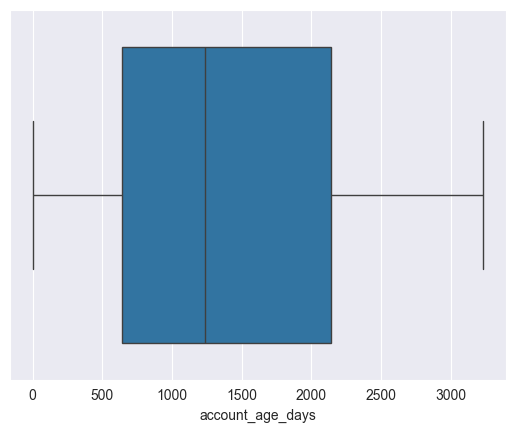

In [335]:
sns.boxplot(data=df, x='account_age_days')

In [336]:
df

,statuses_count,followers_count,friends_count,favourites_count,listed_count,url,lang,time_zone,location,default_profile,...,is_translator,protected,verified,description,crawled_at,updated,test_set_1,test_set_2,target,account_age_days
0,2177,208,332,265,1,0,ja,0,Tokyo .Japan .,0.0,...,0.0,0.0,0.0,15years ago X.Lines24,2015-05-02 06:41:46,2016-03-15 15:53:47,0.0,0.0,0,902
1,2660,330,485,3972,5,0,ja,Tokyo,神奈川県横浜市,1.0,...,0.0,0.0,0.0,保守見習い地元大好き人間。 経済学、電工、仏教を勉強中、ちなDeではいかんのか？ (*^◯^*),2015-05-01 17:20:27,2016-03-15 15:53:48,0.0,0.0,0,566
2,1254,166,177,1185,0,0,en,Eastern Time (US & Canada),0,0.0,...,0.0,0.0,0.0,Let me see what your best move is!,2015-05-01 18:48:28,2016-03-15 15:53:48,0.0,0.0,0,1671
3,202968,2248,981,60304,101,http://t.co/rGV0HIJGsu,en,Greenland,#freePalestine - rip paul,0.0,...,0.0,0.0,0.0,20. menna: #farida #nyc and the 80s actually y...,2015-05-01 13:55:16,2016-03-15 15:53:48,0.0,0.0,0,1900
4,82,21,79,5,0,0,en,0,Wichita KS,1.0,...,0.0,0.0,0.0,Cosmetologist,2015-05-02 01:17:32,2016-03-15 15:53:48,0.0,0.0,0,298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11012,41,169,151,0,12,http://t.co/TKb82K4tFJ,en,Hawaii,"Columbia, SC",0.0,...,0.0,0.0,0.0,Follow this account for geo-targeted Facilitie...,2016-03-15 13:49:15,2016-03-15 13:49:15,0.0,0.0,2,1175
11013,218,332,245,0,31,https://t.co/DByWt4njnT,en,Arizona,New Jersey Non-Metro,0.0,...,0.0,0.0,0.0,Follow this account for geo-targeted Business/...,2016-03-15 13:49:15,2016-03-15 13:49:15,0.0,0.0,2,1161
11014,17,530,300,0,8,http://t.co/paWgrkSWfT,en,0,Puerto Rico,0.0,...,0.0,0.0,0.0,Follow this account for geo-targeted Customer ...,2016-03-15 13:49:15,2016-03-15 13:49:15,0.0,0.0,2,1155
11015,2,247,202,0,1,http://t.co/OnFSpFHC7G,en,Arizona,Puerto Rico,0.0,...,0.0,0.0,0.0,Follow this account for geo-targeted Software ...,2016-03-15 13:49:15,2016-03-15 13:49:15,0.0,0.0,2,1146


In [337]:
df

,statuses_count,followers_count,friends_count,favourites_count,listed_count,url,lang,time_zone,location,default_profile,...,is_translator,protected,verified,description,crawled_at,updated,test_set_1,test_set_2,target,account_age_days
0,2177,208,332,265,1,0,ja,0,Tokyo .Japan .,0.0,...,0.0,0.0,0.0,15years ago X.Lines24,2015-05-02 06:41:46,2016-03-15 15:53:47,0.0,0.0,0,902
1,2660,330,485,3972,5,0,ja,Tokyo,神奈川県横浜市,1.0,...,0.0,0.0,0.0,保守見習い地元大好き人間。 経済学、電工、仏教を勉強中、ちなDeではいかんのか？ (*^◯^*),2015-05-01 17:20:27,2016-03-15 15:53:48,0.0,0.0,0,566
2,1254,166,177,1185,0,0,en,Eastern Time (US & Canada),0,0.0,...,0.0,0.0,0.0,Let me see what your best move is!,2015-05-01 18:48:28,2016-03-15 15:53:48,0.0,0.0,0,1671
3,202968,2248,981,60304,101,http://t.co/rGV0HIJGsu,en,Greenland,#freePalestine - rip paul,0.0,...,0.0,0.0,0.0,20. menna: #farida #nyc and the 80s actually y...,2015-05-01 13:55:16,2016-03-15 15:53:48,0.0,0.0,0,1900
4,82,21,79,5,0,0,en,0,Wichita KS,1.0,...,0.0,0.0,0.0,Cosmetologist,2015-05-02 01:17:32,2016-03-15 15:53:48,0.0,0.0,0,298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11012,41,169,151,0,12,http://t.co/TKb82K4tFJ,en,Hawaii,"Columbia, SC",0.0,...,0.0,0.0,0.0,Follow this account for geo-targeted Facilitie...,2016-03-15 13:49:15,2016-03-15 13:49:15,0.0,0.0,2,1175
11013,218,332,245,0,31,https://t.co/DByWt4njnT,en,Arizona,New Jersey Non-Metro,0.0,...,0.0,0.0,0.0,Follow this account for geo-targeted Business/...,2016-03-15 13:49:15,2016-03-15 13:49:15,0.0,0.0,2,1161
11014,17,530,300,0,8,http://t.co/paWgrkSWfT,en,0,Puerto Rico,0.0,...,0.0,0.0,0.0,Follow this account for geo-targeted Customer ...,2016-03-15 13:49:15,2016-03-15 13:49:15,0.0,0.0,2,1155
11015,2,247,202,0,1,http://t.co/OnFSpFHC7G,en,Arizona,Puerto Rico,0.0,...,0.0,0.0,0.0,Follow this account for geo-targeted Software ...,2016-03-15 13:49:15,2016-03-15 13:49:15,0.0,0.0,2,1146


In [338]:
df.columns

Index(['statuses_count', 'followers_count', 'friends_count',
       'favourites_count', 'listed_count', 'url', 'lang', 'time_zone',
       'location', 'default_profile', 'default_profile_image', 'geo_enabled',
       'profile_use_background_image', 'profile_background_tile', 'utc_offset',
       'is_translator', 'protected', 'verified', 'description', 'crawled_at',
       'updated', 'test_set_1', 'test_set_2', 'target', 'account_age_days'],
      dtype='object')

In [339]:
df

,statuses_count,followers_count,friends_count,favourites_count,listed_count,url,lang,time_zone,location,default_profile,...,is_translator,protected,verified,description,crawled_at,updated,test_set_1,test_set_2,target,account_age_days
0,2177,208,332,265,1,0,ja,0,Tokyo .Japan .,0.0,...,0.0,0.0,0.0,15years ago X.Lines24,2015-05-02 06:41:46,2016-03-15 15:53:47,0.0,0.0,0,902
1,2660,330,485,3972,5,0,ja,Tokyo,神奈川県横浜市,1.0,...,0.0,0.0,0.0,保守見習い地元大好き人間。 経済学、電工、仏教を勉強中、ちなDeではいかんのか？ (*^◯^*),2015-05-01 17:20:27,2016-03-15 15:53:48,0.0,0.0,0,566
2,1254,166,177,1185,0,0,en,Eastern Time (US & Canada),0,0.0,...,0.0,0.0,0.0,Let me see what your best move is!,2015-05-01 18:48:28,2016-03-15 15:53:48,0.0,0.0,0,1671
3,202968,2248,981,60304,101,http://t.co/rGV0HIJGsu,en,Greenland,#freePalestine - rip paul,0.0,...,0.0,0.0,0.0,20. menna: #farida #nyc and the 80s actually y...,2015-05-01 13:55:16,2016-03-15 15:53:48,0.0,0.0,0,1900
4,82,21,79,5,0,0,en,0,Wichita KS,1.0,...,0.0,0.0,0.0,Cosmetologist,2015-05-02 01:17:32,2016-03-15 15:53:48,0.0,0.0,0,298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11012,41,169,151,0,12,http://t.co/TKb82K4tFJ,en,Hawaii,"Columbia, SC",0.0,...,0.0,0.0,0.0,Follow this account for geo-targeted Facilitie...,2016-03-15 13:49:15,2016-03-15 13:49:15,0.0,0.0,2,1175
11013,218,332,245,0,31,https://t.co/DByWt4njnT,en,Arizona,New Jersey Non-Metro,0.0,...,0.0,0.0,0.0,Follow this account for geo-targeted Business/...,2016-03-15 13:49:15,2016-03-15 13:49:15,0.0,0.0,2,1161
11014,17,530,300,0,8,http://t.co/paWgrkSWfT,en,0,Puerto Rico,0.0,...,0.0,0.0,0.0,Follow this account for geo-targeted Customer ...,2016-03-15 13:49:15,2016-03-15 13:49:15,0.0,0.0,2,1155
11015,2,247,202,0,1,http://t.co/OnFSpFHC7G,en,Arizona,Puerto Rico,0.0,...,0.0,0.0,0.0,Follow this account for geo-targeted Software ...,2016-03-15 13:49:15,2016-03-15 13:49:15,0.0,0.0,2,1146


In [340]:
for col in ['url', 'time_zone', 'location', 'description', 'lang']:
    # First ensure the column is treated as string type
    df[col] = df[col].astype(str)
    # Replace '0' with 0 and anything else with 1
    df[col] = df[col].apply(lambda x: 0 if x == '0' else 1)

In [341]:
df['lang'].unique()

array([1, 0])

In [342]:
df

,statuses_count,followers_count,friends_count,favourites_count,listed_count,url,lang,time_zone,location,default_profile,...,is_translator,protected,verified,description,crawled_at,updated,test_set_1,test_set_2,target,account_age_days
0,2177,208,332,265,1,0,1,0,1,0.0,...,0.0,0.0,0.0,1,2015-05-02 06:41:46,2016-03-15 15:53:47,0.0,0.0,0,902
1,2660,330,485,3972,5,0,1,1,1,1.0,...,0.0,0.0,0.0,1,2015-05-01 17:20:27,2016-03-15 15:53:48,0.0,0.0,0,566
2,1254,166,177,1185,0,0,1,1,0,0.0,...,0.0,0.0,0.0,1,2015-05-01 18:48:28,2016-03-15 15:53:48,0.0,0.0,0,1671
3,202968,2248,981,60304,101,1,1,1,1,0.0,...,0.0,0.0,0.0,1,2015-05-01 13:55:16,2016-03-15 15:53:48,0.0,0.0,0,1900
4,82,21,79,5,0,0,1,0,1,1.0,...,0.0,0.0,0.0,1,2015-05-02 01:17:32,2016-03-15 15:53:48,0.0,0.0,0,298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11012,41,169,151,0,12,1,1,1,1,0.0,...,0.0,0.0,0.0,1,2016-03-15 13:49:15,2016-03-15 13:49:15,0.0,0.0,2,1175
11013,218,332,245,0,31,1,1,1,1,0.0,...,0.0,0.0,0.0,1,2016-03-15 13:49:15,2016-03-15 13:49:15,0.0,0.0,2,1161
11014,17,530,300,0,8,1,1,0,1,0.0,...,0.0,0.0,0.0,1,2016-03-15 13:49:15,2016-03-15 13:49:15,0.0,0.0,2,1155
11015,2,247,202,0,1,1,1,1,1,0.0,...,0.0,0.0,0.0,1,2016-03-15 13:49:15,2016-03-15 13:49:15,0.0,0.0,2,1146


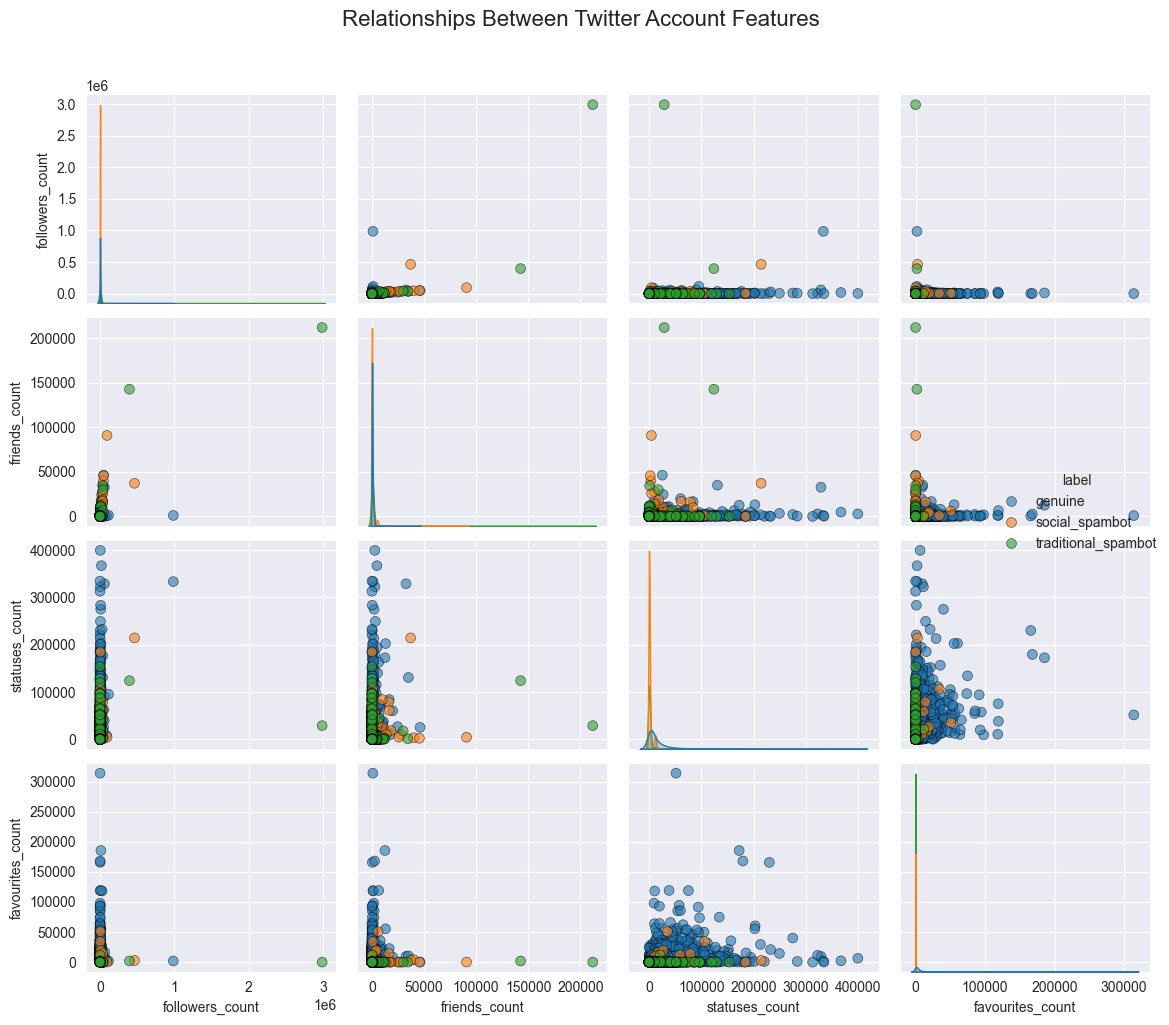

In [99]:
# Create a pairplot showing relationships between multiple variables
features = ['followers_count', 'friends_count', 'statuses_count', 'favourites_count']
sns.pairplot(
    all_data,
    vars=features,
    hue='label',
    diag_kind='kde',
    plot_kws={'alpha': 0.6, 's': 50, 'edgecolor': 'k', 'linewidth': 0.5}
)
plt.suptitle('Relationships Between Twitter Account Features', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

In [287]:
df['following']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
11012    0.0
11013    0.0
11014    0.0
11015    0.0
11016    0.0
Name: following, Length: 11017, dtype: float64

In [288]:
data = df.drop(columns=['test_set_1','test_set_2'])

In [297]:
data.columns

Index(['statuses_count', 'followers_count', 'friends_count',
       'favourites_count', 'listed_count', 'url', 'lang', 'time_zone',
       'location', 'default_profile', 'default_profile_image', 'geo_enabled',
       'profile_use_background_image', 'profile_background_tile', 'utc_offset',
       'is_translator', 'protected', 'verified', 'description', 'following',
       'crawled_at', 'updated', 'target', 'account_age_days'],
      dtype='object')

In [300]:
data['lang']

0        1
1        1
2        1
3        1
4        1
        ..
11012    1
11013    1
11014    1
11015    1
11016    1
Name: lang, Length: 11017, dtype: int64

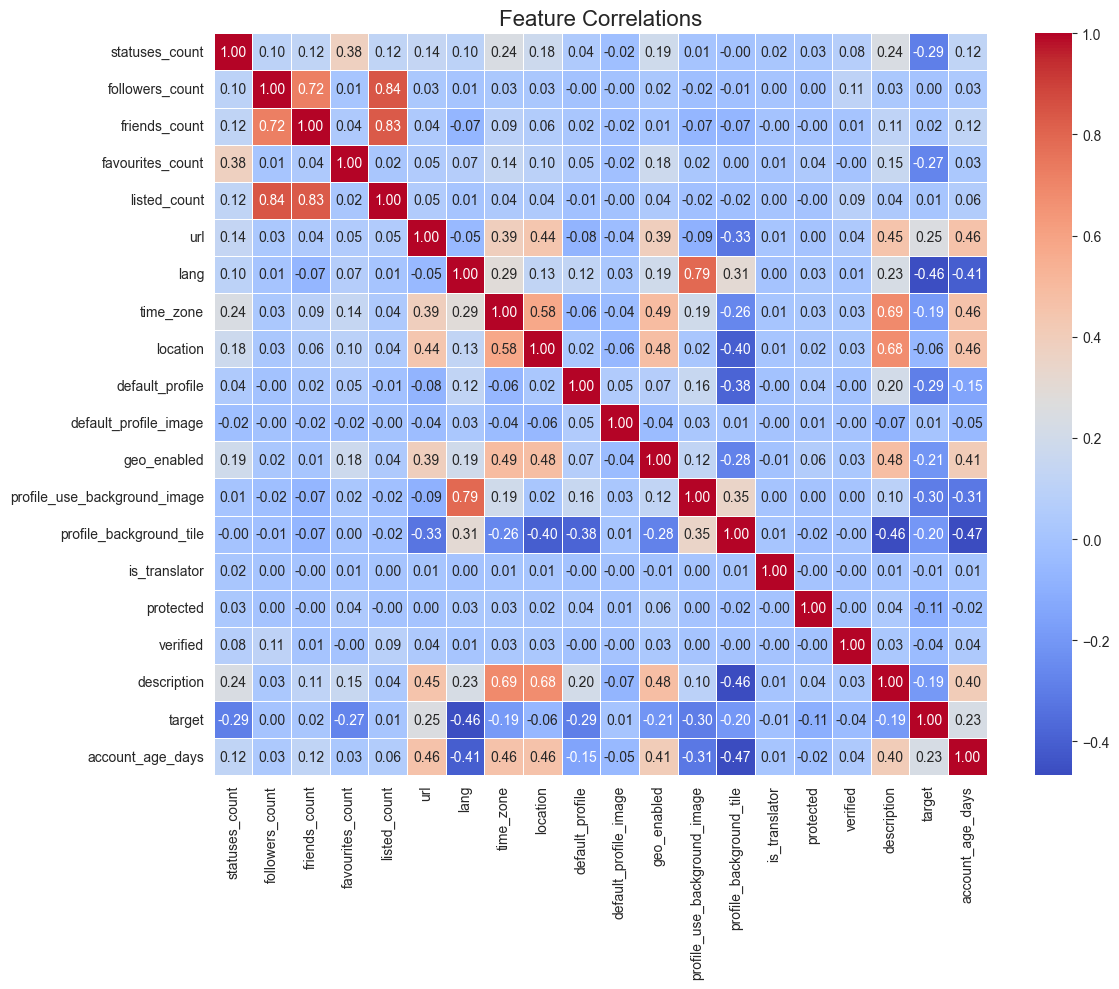

In [344]:
# Select only numeric columns
corr = data[['statuses_count', 'followers_count', 'friends_count',
       'favourites_count', 'listed_count', 'url', 'lang', 'time_zone',
       'location', 'default_profile', 'default_profile_image', 'geo_enabled',
       'profile_use_background_image', 'profile_background_tile',
       'is_translator', 'protected', 'verified', 'description', 'target', 'account_age_days']].corr()

# Create correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr, 
    annot=True, 
    cmap='coolwarm', 
    fmt='.2f',
    linewidths=0.5
)
plt.title('Feature Correlations', fontsize=16)
plt.tight_layout()
plt.show()

In [347]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# 1) assume you’ve already loaded your DataFrame as df
#    and that ISBOT is a boolean or 0/1 column
data = data[['statuses_count', 'followers_count', 'friends_count',
       'favourites_count', 'listed_count', 'url', 'lang', 'time_zone',
       'location', 'default_profile', 'default_profile_image', 'geo_enabled',
       'profile_use_background_image', 'profile_background_tile',
       'is_translator', 'protected', 'verified', 'description', 'target', 'account_age_days']]
# 2) build X and y
X = data.drop(columns=['target'])
y = data['target'].astype(int)

# 3) if you haven’t already, make sure any True/False or categorical columns
#    are numeric. In your case GENDER_Female / GENDER_Male are already one‐hot.

#    If you’d rather, you can drop one of the two gender columns to avoid perfect multicollinearity:
# X = X.drop(columns=['GENDER_Female'])

# 4) split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    stratify=y,           # keep same bot/non‑bot ratio
    test_size=0.2,
    random_state=42
)

# 5) train a Random Forest
clf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    n_jobs=-1,
    random_state=42
)
clf.fit(X_train, y_train)

# 6) evaluate on hold‑out
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

print("Classification report:")
print(classification_report(y_test, y_pred))

print("ROC AUC:", roc_auc_score(y_test, y_proba))

print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))

# 7) inspect feature importances
importances = pd.Series(clf.feature_importances_, index=X.columns)
print("\nTop 10 features by importance:")
print(importances.sort_values(ascending=False).head(10))


Classification report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       695
           1       1.00      0.98      0.99       983
           2       1.00      0.99      0.99       526

    accuracy                           0.99      2204
   macro avg       0.99      0.99      0.99      2204
weighted avg       0.99      0.99      0.99      2204



ValueError: multi_class must be in ('ovo', 'ovr')

In [349]:
len(data.columns)

20

In [351]:
data.to_csv('data.csv')